<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/LowCodeTimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Low-code Time Series Analysis.

There are several low-code Python libraries available for Time Series Analysis. Here are some of the most popular ones:

* [PyCaret Time Series Analysis](https://pycaret.gitbook.io/docs/learn-pycaret/official-blog/time-series-101-for-beginners): This is a low-code library for time series forecasting and anomaly detection. It provides a simple and intuitive interface for working with time-series data, and includes several built-in models for forecasting and anomaly detection.

* [Darts Time Series Analysis](https://unit8co.github.io/darts/). Darts is a Python library for user-friendly forecasting and anomaly detection on time series. It contains a variety of models, from classics such as ARIMA to deep neural networks.



## PyCaret

In [1]:
# install pycaret in Google Colab including pre-releases
!pip install --pre pycaret --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━

In [3]:
# Load required libraries
import numpy as np
import pandas as pd

from datetime import date

import pycaret
# import the regression module
from pycaret.regression import *
from pycaret.time_series import *

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px


In [4]:
# Read the monthly means CO2 levels dataset from Mauna Loa Observatory
# URL= https://gml.noaa.gov/ccgg/trends/data.html 
co2data = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/MaunaLoaCO2/co2_mm_mlo.csv"
# The file has Metadata first 56 lines
# The column names are in line 57
df_dist = pd.read_csv(co2data, header=0 , skiprows=56)

# AIr passengers data
#passengers = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/AirPassengers.csv"
#df_dist = pd.read_csv(passengers)
#df_dist['Month'] = pd.to_datetime(df_dist['Month'])
#df_dist = df_dist.rename(columns={'#Passengers': 'Passengers', 'Month':'Date'})

# Print the dataframe head.
df_dist.head()


year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.70          314.43     -1 -9.99 -0.99
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2  1958      5     1958.3699   317.51          314.71     -1 -9.99 -0.99
3  1958      6     1958.4548   317.24          315.14     -1 -9.99 -0.99
4  1958      7     1958.5370   315.86          315.18     -1 -9.99 -0.99

In [ ]:
df_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            780 non-null    int64  
 1   month           780 non-null    int64  
 2   decimal date    780 non-null    float64
 3   average         780 non-null    float64
 4   deseasonalized  780 non-null    float64
 5   ndays           780 non-null    int64  
 6   sdev            780 non-null    float64
 7   unc             780 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 48.9 KB


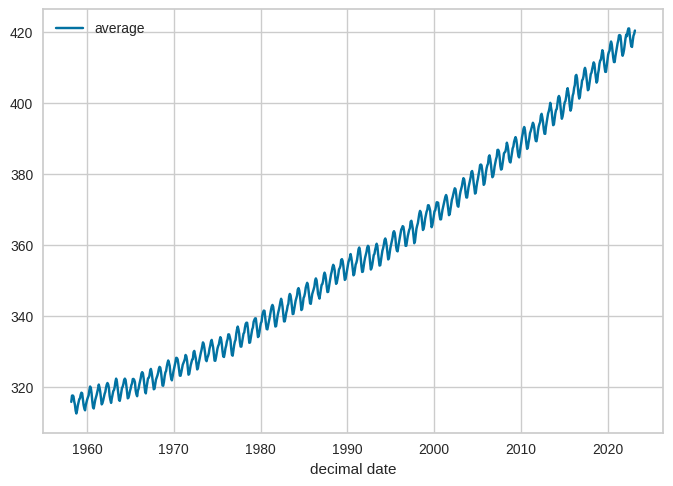

In [5]:
# Plot the dataset
df_dist.plot.line(x='decimal date', y='average');

In [6]:
# Prepare data for Machine Learning Model
df = df_dist.copy()

# Create Month and Year columns
#df['Month']=df['Date'].dt.month
#df['Year'] = df['Date'].dt.year 

# create a sequence of numbers
df['series'] = np.arange(1,len(df)+1)

# drop unnecessary columns and re-arrange

dfML = df[['series', 'year', 'month', 'average']] 

# check the head of the dataset
dfML.head()


series  year  month  average
0       1  1958      3   315.70
1       2  1958      4   317.45
2       3  1958      5   317.51
3       4  1958      6   317.24
4       5  1958      7   315.86

In [7]:
dfML.tail()


series  year  month  average
775     776  2022     10   415.78
776     777  2022     11   417.51
777     778  2022     12   418.95
778     779  2023      1   419.47
779     780  2023      2   420.41

In [8]:
# Select from year 1990
dfML = dfML[dfML['year'] >= 1990] 

# split data into train-test set, at year=2022
train = dfML[dfML['year'] < 2022]
test = dfML[dfML['year'] >= 2022]

# check shape
train.shape, test.shape


((384, 4), (14, 4))

In [9]:
from pycaret.regression import *

# initialize setup
s = setup(data = train, test_data = test, target = 'average', fold_strategy = 'timeseries', numeric_features = ['year', 'series'], fold = 3, 
          transform_target = True, session_id = 123)


In [10]:
# Train and evaluate models
best = compare_models(sort = 'MAE')


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [11]:
# The best model based on MAE
prediction_holdout = predict_model(best);


In [12]:
# generate predictions on the original dataset

predictions = predict_model(best, data=dfML)

# add a date column in the dataset
predictions['date'] = pd.date_range(start='1990-01-01', end = '2023-02-01', freq = 'MS')

# line plot
fig = px.line(predictions, x='date', y=['average', 'prediction_label'], template = 'plotly_white')

# add a vertical rectange for test-set separation
fig.add_vrect(x0='2022-01-01', x1='2023-02-01', fillcolor='grey', opacity=0.25, line_width=0)
fig.show()


In [13]:
predictions.head()


series  year  month     average  prediction_label       date
382     383  1990      1  353.859985        353.446605 1990-01-01
383     384  1990      2  355.100006        353.244758 1990-02-01
384     385  1990      3  355.750000        353.043167 1990-03-01
385     386  1990      4  356.380005        352.841831 1990-04-01
386     387  1990      5  357.380005        352.640750 1990-05-01

In [14]:
predictions.tail()

series  year  month     average  prediction_label       date
775     776  2022     10  415.779999        416.984503 2022-10-01
776     777  2022     11  417.510010        416.693150 2022-11-01
777     778  2022     12  418.950012        416.402249 2022-12-01
778     779  2023      1  419.470001        422.147857 2023-01-01
779     780  2023      2  420.410004        421.848432 2023-02-01

In [15]:
# define array size variable
lenp = len(predictions) +1
lenp


399

In [16]:
final_best = finalize_model(best)

In [17]:
# series number starts at 383
series_shift=382 
future_dates = pd.date_range(start = '2023-03-01', end = '2026-01-01', freq = 'MS')
lenfd = len(future_dates)

future_df = pd.DataFrame()

future_df['month'] = [i.month for i in future_dates]
future_df['year'] = [i.year for i in future_dates]    
future_df['series'] = np.arange(lenp+series_shift, (lenp+series_shift+lenfd))
future_df.head()


month  year  series
0      3  2023     781
1      4  2023     782
2      5  2023     783
3      6  2023     784
4      7  2023     785

In [18]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()


month  year  series  prediction_label
0      3  2023     781        421.847325
1      4  2023     782        421.550843
2      5  2023     783        421.254883
3      6  2023     784        420.959443
4      7  2023     785        420.664522

In [19]:
predictions_future.tail()

month  year  series  prediction_label
30      9  2025     811        425.309119
31     10  2025     812        425.006503
32     11  2025     813        424.704426
33     12  2025     814        424.402887
34      1  2026     815        430.466899

In [20]:
# Plot actual data and future predictions 

concat_df = pd.concat([dfML, predictions_future], axis=0)
concat_df_i = pd.date_range(start='1990-01-01', end = '2026-01-01', freq = 'MS')
concat_df.set_index(concat_df_i, inplace=True)

fig = px.line(concat_df, x=concat_df.index, y=['average', 'prediction_label'], template = 'plotly_white')
fig.show()


## Darts

In [21]:
# Install the Darts library
!pip install --pre darts --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.4/716.4 KB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.4/372.4 KB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.9/242.9 KB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 KB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py)

In [22]:
%matplotlib inline
## Importing Libraries
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT
)

from darts.metrics import mape, mase
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.datasets import AirPassengersDataset

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)


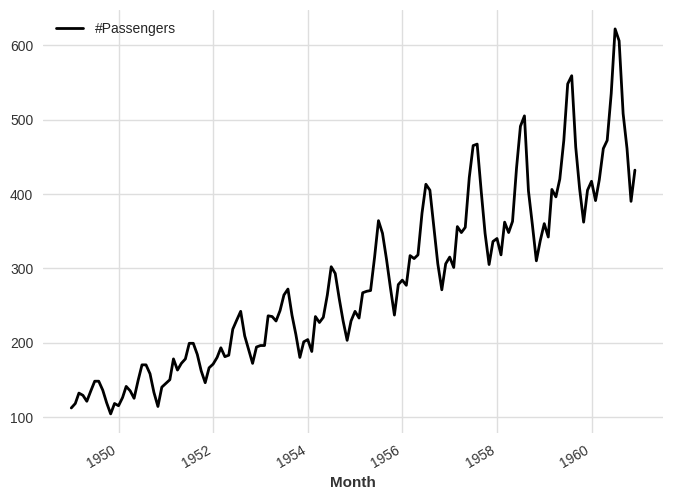

In [23]:
## Load the pre-loaded Dataset
series = AirPassengersDataset().load()
series.plot()

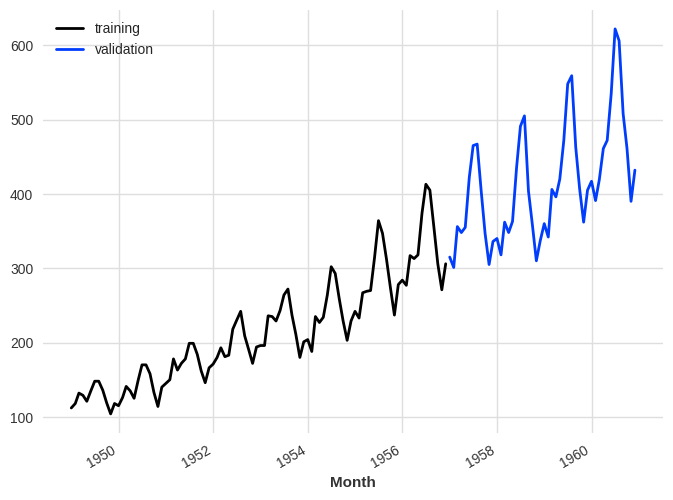

In [24]:
## Split train and test data
train, val = series.split_before(pd.Timestamp('19570101'))
train.plot(label='training')
val.plot(label='validation')
plt.legend();


In [25]:
# Fitting multiple models and checking the MAPE (Mean Absolute Percentage Error). The higher the better.
def eval_model(model):
  model.fit(train)
  forecast = model.predict(len(val))
  print('model {} obtains MAPE: {:.2f}%'.format(model, mape(val, forecast)))


In [26]:
# Evaluate a set of models
eval_model(ExponentialSmoothing())
eval_model(Prophet())
eval_model(AutoARIMA())
eval_model(Theta())


model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 5.03%
model Prophet obtains MAPE: 9.43%
model Auto-ARIMA obtains MAPE: 18.83%
model Theta(2) obtains MAPE: 10.22%


NameError: ignored

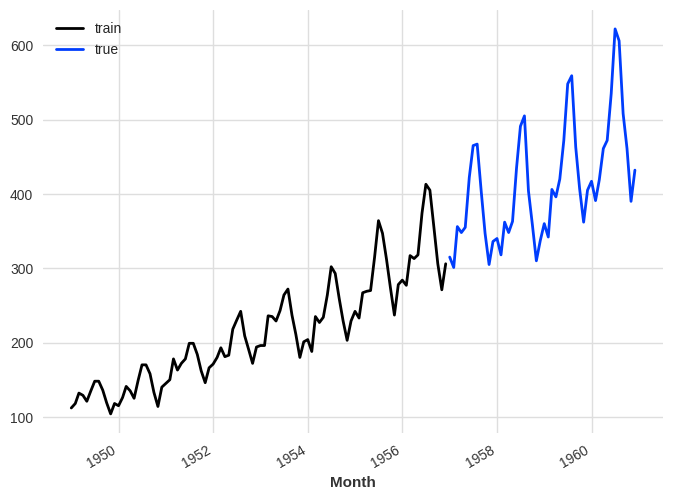

In [27]:
## Visualizing theta foreacsting result
train.plot(label='train')
val.plot(label='true')
forecast.plot(label='prediction')
plt.legend();


In [28]:
# Tuning the theta parameter to see if MAPE reduces
##Search for the best theta parameter, by trying 50 different values
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta


In [29]:
## Fitting and predicting again usinh best theta value
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE is: {:.2f}, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))


The MAPE is: 4.45, with theta = -3.1020408163265305.


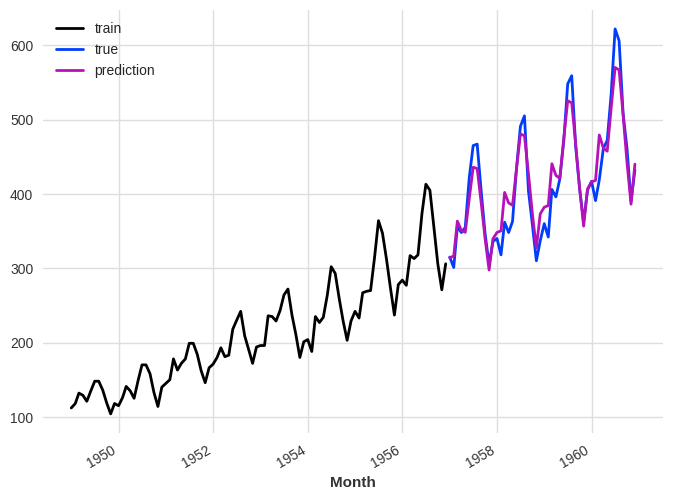

In [30]:
# Visualize 
train.plot(label='train')
val.plot(label='true')
pred_best_theta.plot(label='prediction')
plt.legend();
